## EDA: understand the data and describe it



### Table of contents

- [Open and check the data](#step1)
    - [Plot velocity](#step2)
    - [Plot level](#step3) 
- [Seasonal trends](#step4)
    - [Plot seasonal trends for velocity](#step5)
    - [Plot seasonal trends for level](#step6)
- [General Conclusions](#step7)
   

### Open and check the data<a name="step1"></a>

In [99]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date 
import holidays 

from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

In [100]:
#read the data
velocity = pd.read_csv('velocity.csv')
velocity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            350784 non-null  object 
 1   velocity        350679 non-null  float64
 2   final_velocity  329984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.0+ MB


In [101]:
#read the data
level = pd.read_csv('level.csv')
level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         350784 non-null  object 
 1   level        350784 non-null  float64
 2   final_level  329984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.0+ MB


In [102]:
#merge the two df 
total = velocity.merge(level, left_on="time",
    right_on="time", how='left' )
total.head()

,time,velocity,final_velocity,level,final_level
0,2014-09-01 00:00:00,0.8883,0.8883,74.529999,74.529999
1,2014-09-01 00:05:00,0.8856,0.8856,75.029999,75.029999
2,2014-09-01 00:10:00,0.8379,0.8379,74.300003,74.300003
3,2014-09-01 00:15:00,0.8514,0.8514,74.309998,74.309998
4,2014-09-01 00:20:00,0.8487,0.8487,80.050003,80.050003


In [103]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350784 entries, 0 to 350783
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            350784 non-null  object 
 1   velocity        350679 non-null  float64
 2   final_velocity  329984 non-null  float64
 3   level           350784 non-null  float64
 4   final_level     329984 non-null  float64
dtypes: float64(4), object(1)
memory usage: 16.1+ MB


In [104]:
#change to datetime
total['time'] = pd.to_datetime(total["time"])
total.dtypes

time              datetime64[ns]
velocity                 float64
final_velocity           float64
level                    float64
final_level              float64
dtype: object

In [105]:
#check if there are equal time intervals:
total.set_index('time').index.to_series().diff().astype('timedelta64[m]').value_counts()

5.0    350783
Name: time, dtype: int64

In [106]:
#check for duplicates:
total.duplicated().sum()

0

In [107]:
#part of the missing data within the columns
total.isna().sum()/len(velocity)

time              0.000000
velocity          0.000299
final_velocity    0.059296
level             0.000000
final_level       0.059296
dtype: float64

In [108]:
#I proceed the current models without NA replacing. If needed, change to 0 or mean or median>
#table['col'].fillna((table['col'].median()), inplace=True)

In [109]:
#describe the values to see extreme values(outliers)
total.describe()

,velocity,final_velocity,level,final_level
count,350679.000000,329984.000000,350784.000000,329984.000000
mean,0.809007,0.829326,85.103426,83.978504
std,0.183932,0.165333,13.422073,11.948610
min,0.020700,0.140400,20.260000,20.260000
25%,0.674100,0.710100,75.760002,75.290001
50%,0.863100,0.877500,85.209999,84.820000
75%,0.953100,0.957600,91.279999,90.660004
max,1.325700,1.325700,153.320007,153.320007


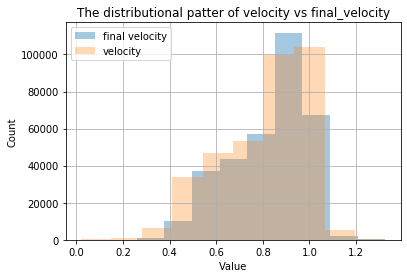

In [110]:
'''plot the values in order to understand distribution pattern'''
'''velocity'''

total.final_velocity.hist(alpha=0.4, label="final velocity")
total.velocity.hist(alpha=0.3, label="velocity")
plt.title("The distributional patter of velocity vs final_velocity")
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend();

#--> the both values are highly correlated, and final velocity take more extreme values

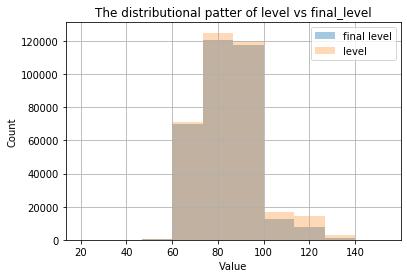

In [111]:
'''plot the values in order to understand distribution pattern'''
'''level'''

total.final_level.hist(alpha=0.4, label="final level")
total.level.hist(alpha=0.3, label="level")
plt.title("The distributional patter of level vs final_level")
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend();

# --> the both values are highly correlated

### Plot velocity<a name="step2"></a>

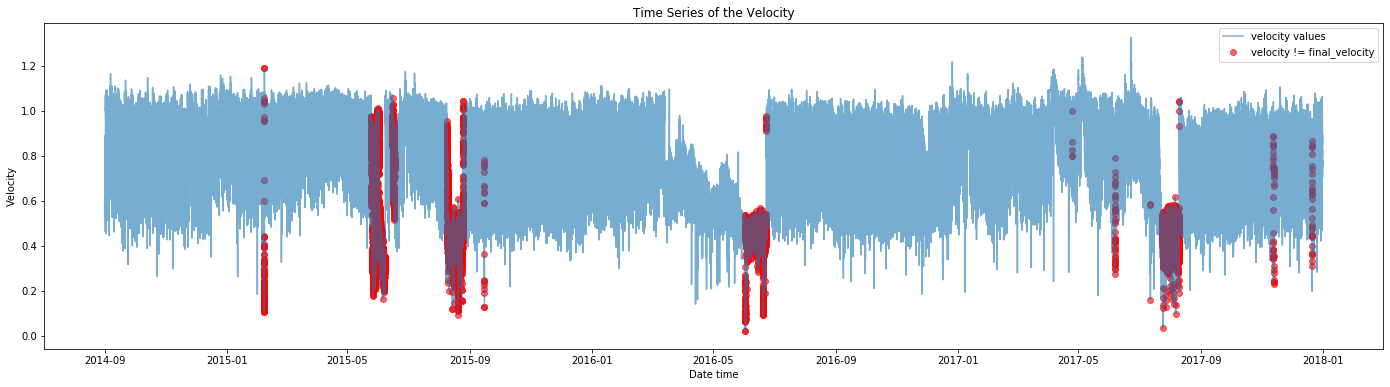

In [112]:
'''plot initial values with possible data loss or inconsistency'''
'''velocity, total data'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity, 
         alpha=0.6, 
         label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o",
            color='red', label="velocity != final_velocity", alpha=0.6)

plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the Velocity');
plt.legend(loc="best")
plt.show()

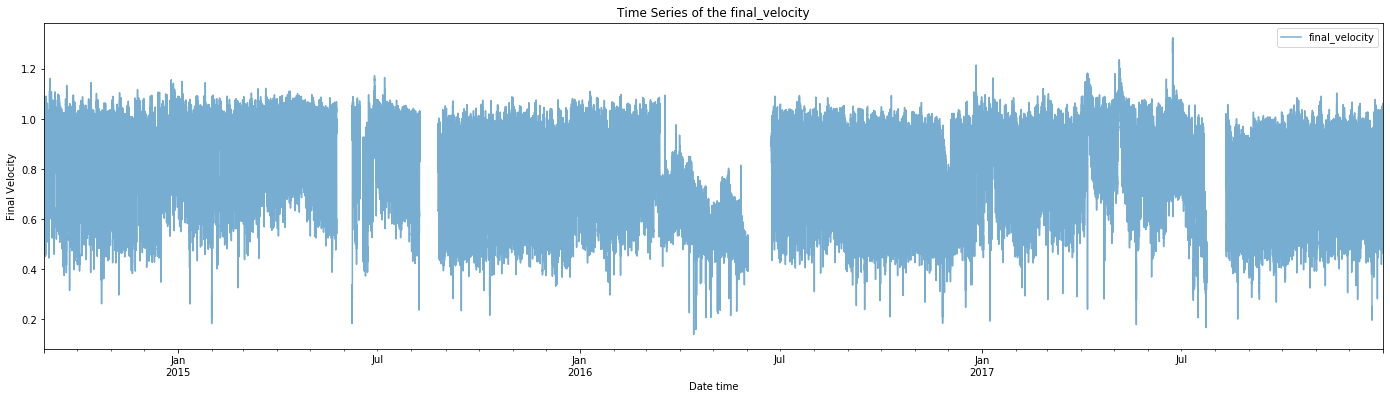

In [113]:
'''plot initial values'''
'''final_velocity'''

total.plot(x='time', y='final_velocity', alpha=.6, figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Final Velocity')
plt.title('Time Series of the final_velocity');

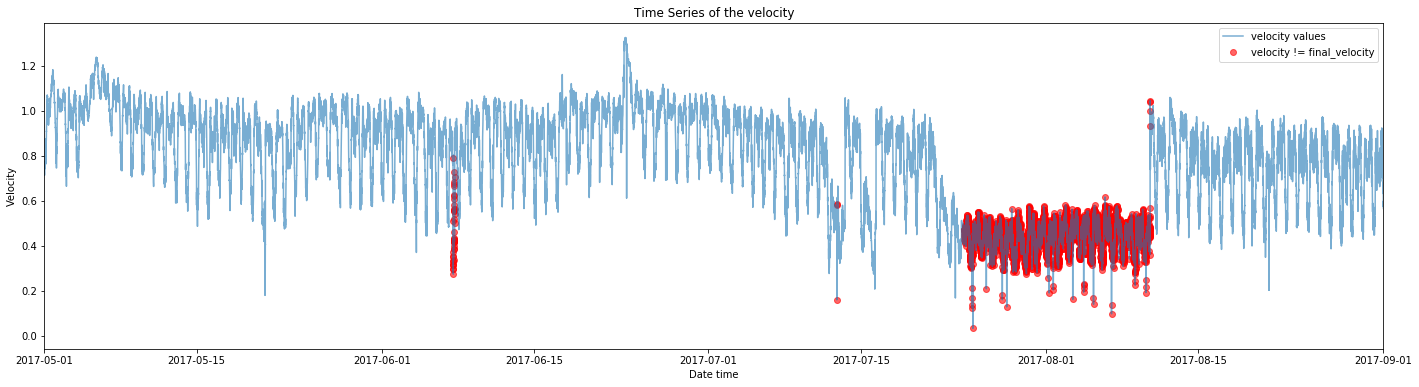

In [114]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 3 random months, where velocity!=final_velocity'''
'''velocity'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-05-01 00:00:00','2017-09-01 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

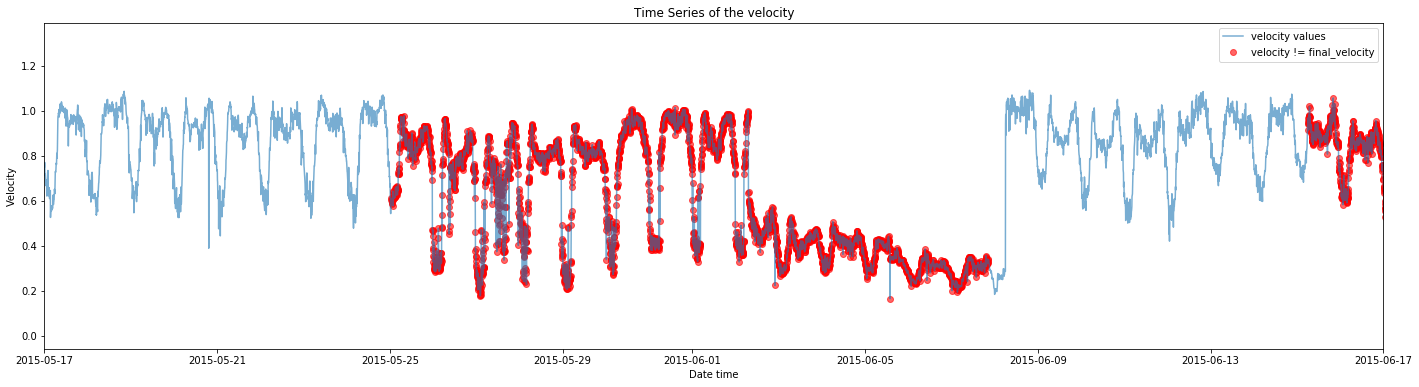

In [115]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month,  where velocity!=final_velocity'''
'''velocity'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps

plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2015-05-17 00:00:00','2015-06-17 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

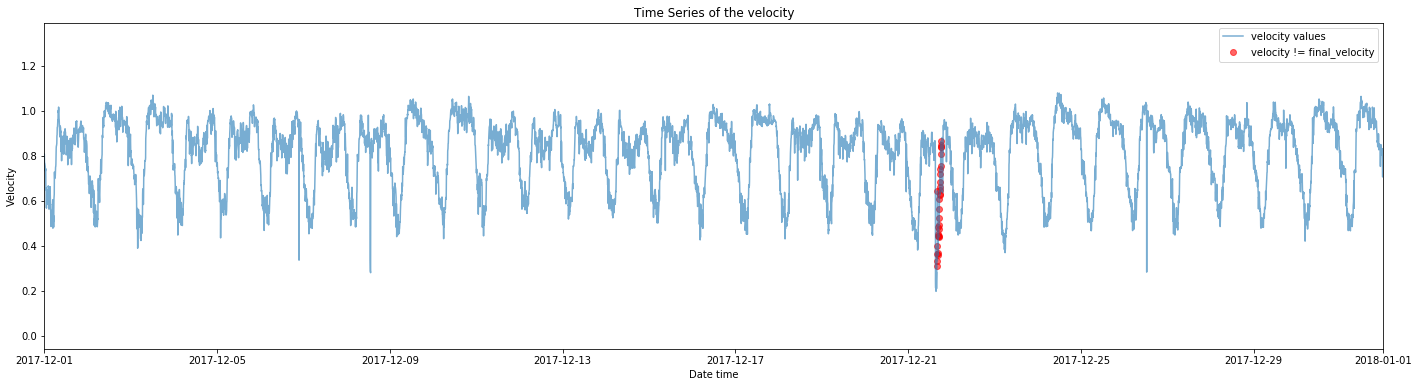

In [116]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where velocity!=final_velocity'''
'''velocity'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2018-01-01 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");


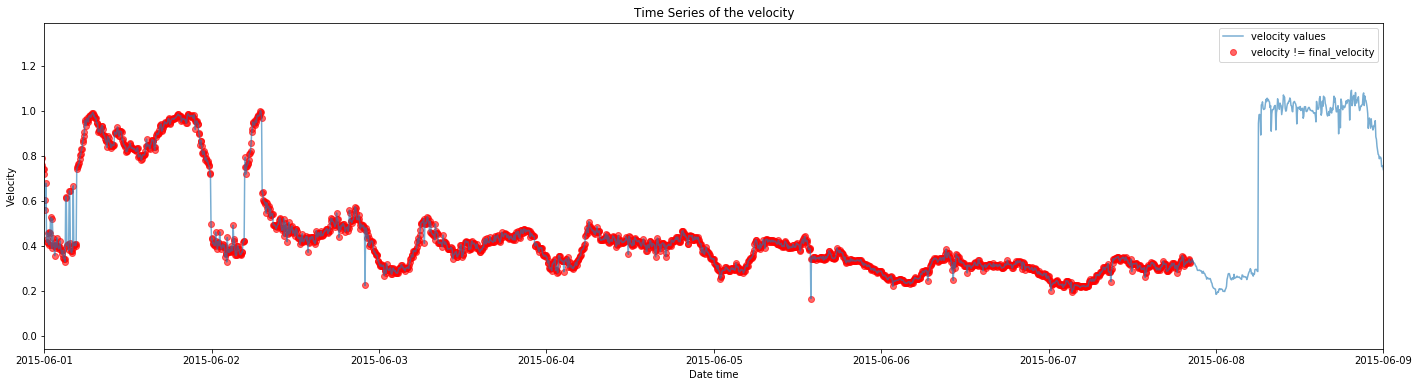

In [117]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
'''velocity'''


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2015-06-01 00:00:00','2015-06-09 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");


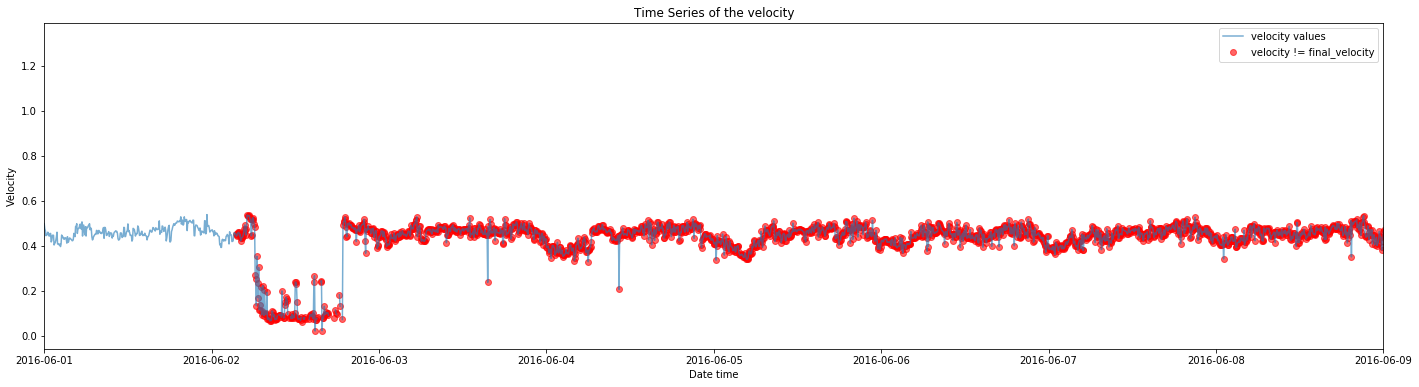

In [119]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
'''velocity'''


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2016-06-01 00:00:00','2016-06-09 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

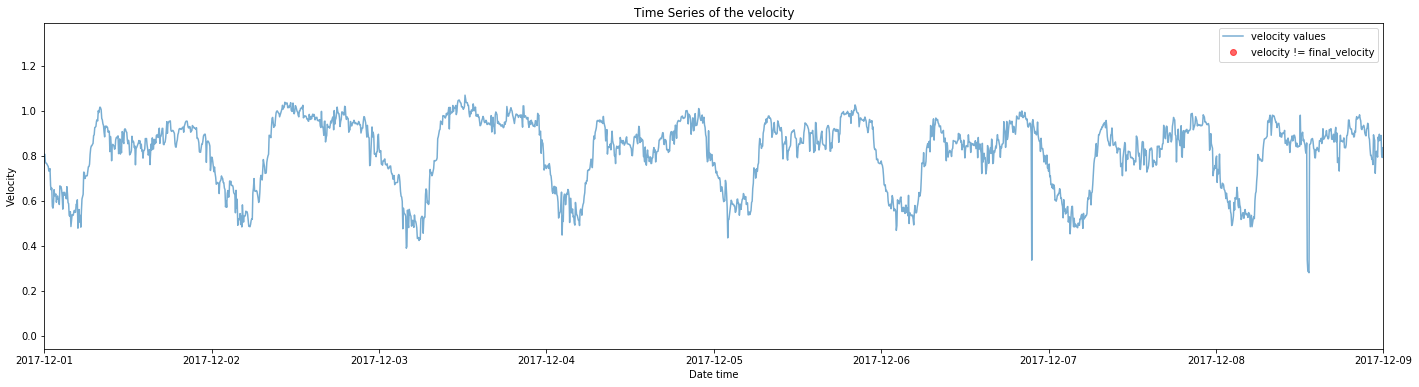

In [120]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where velocity!=final_velocity'''
'''velocity'''


pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.velocity,  alpha=0.6, label="velocity values")

plt.scatter(x='time', y='velocity', data=total[total.velocity!=total.final_velocity], 
             marker="o", color='red', label="velocity != final_velocity", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2017-12-09 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

### Plot level<a name="step3"></a>

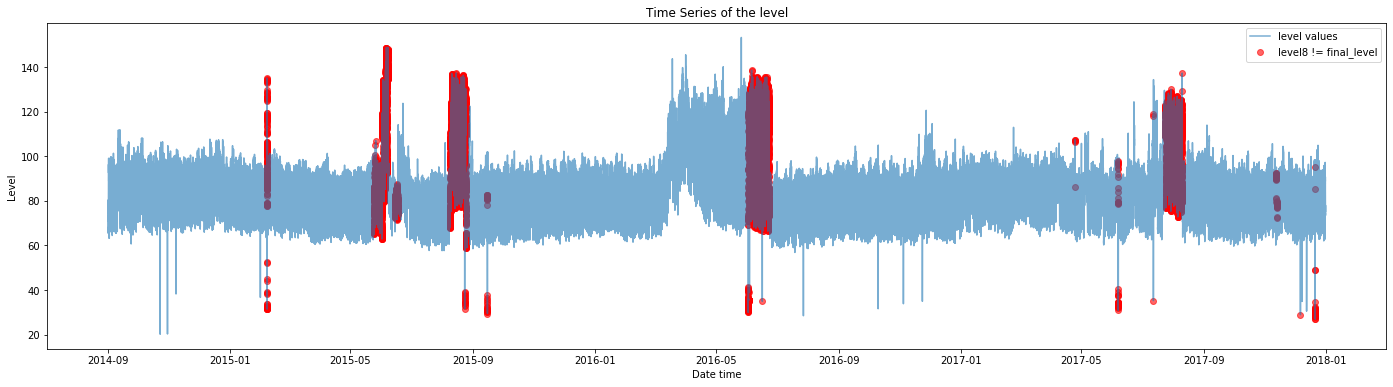

In [121]:
'''plot initial values with possible data loss or inconsistency'''
'''level, total data'''

#pd.plotting.register_matplotlib_converters()  # needed to plot timestamps


plt.subplots(figsize=(24,6))

plt.plot(total.time, total.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=total[total.level != total.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level8 != final_level", alpha=0.6)

plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.legend(loc="best")
plt.show()

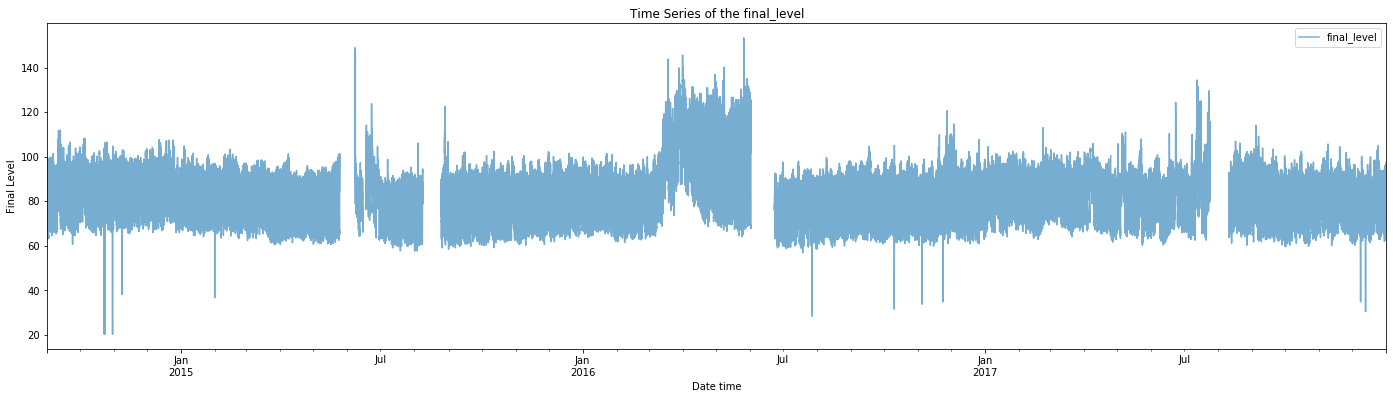

In [122]:
'''plot initial values'''
'''final_level'''

total.plot(x='time', y='final_level', alpha=.6, figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Final Level')
plt.title('Time Series of the final_level');

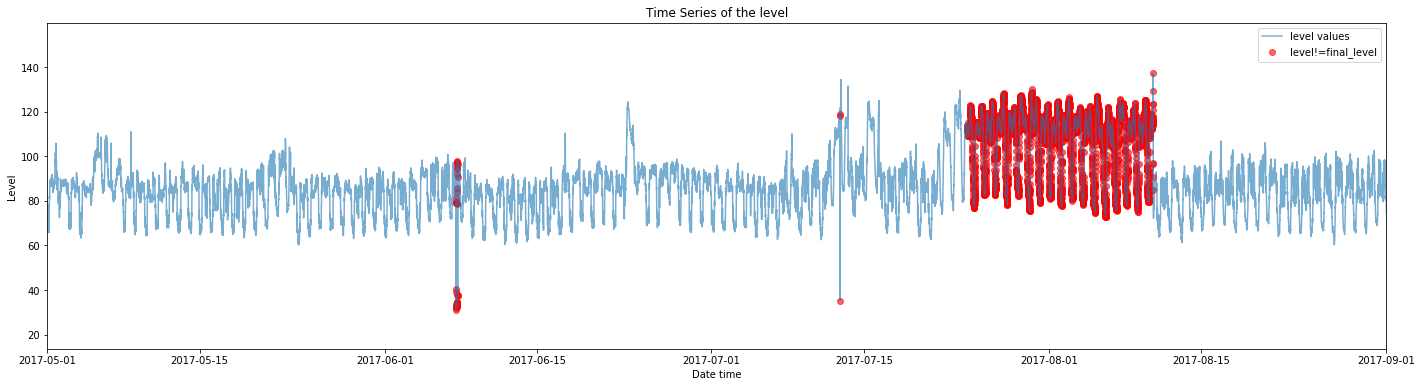

In [123]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 3 random months, where level!=final_level'''
'''level'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.level,  alpha=0.6, label="level values")

plt.scatter(x='time', y='level', data=total[total.level!=total.final_level], 
             marker="o", color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2017-05-01 00:00:00','2017-09-01 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

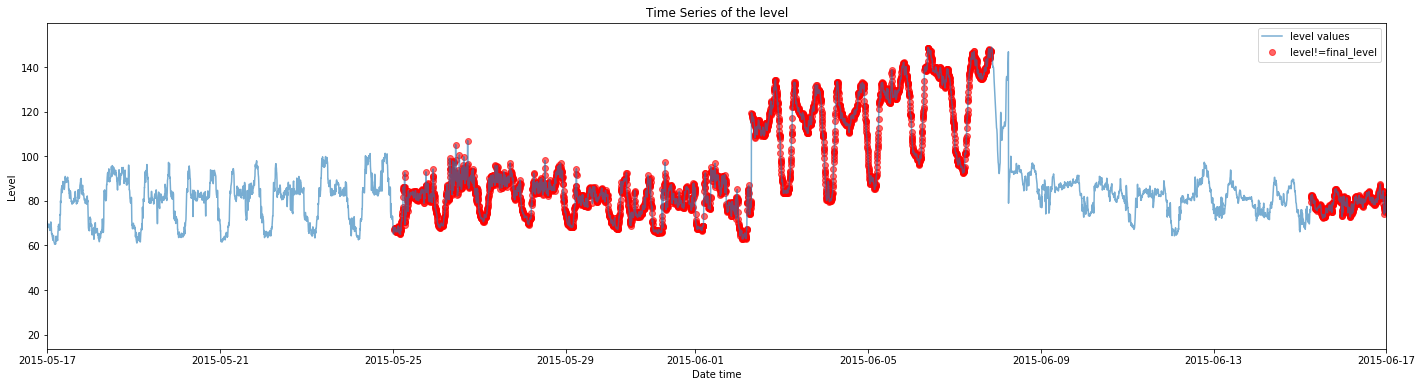

In [124]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where level!=final_level'''
'''level'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=total[total.level!=total.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2015-05-17 00:00:00','2015-06-17 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

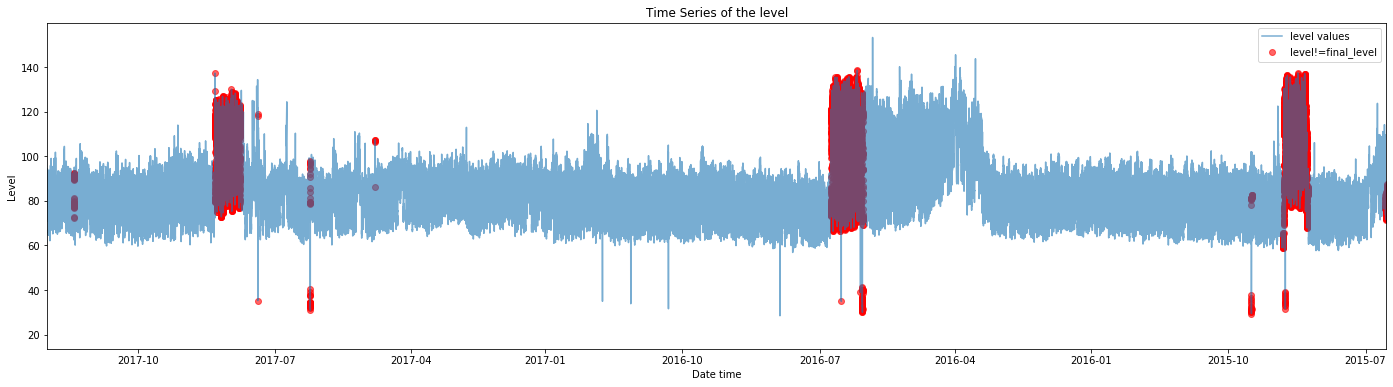

In [125]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where level!=final_level'''
'''level'''

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(total.time, total.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=total[total.level!=total.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2015-06-17 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

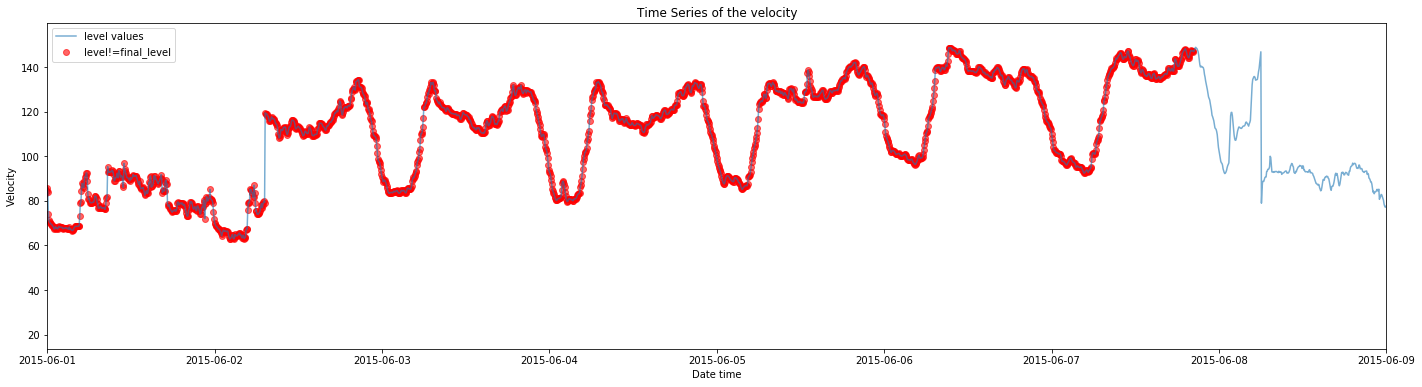

In [126]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
'''level'''

plt.subplots(figsize=(24,6))

plt.plot(total.time, total.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=total[total.level!=total.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2015-06-01 00:00:00','2015-06-09 00:00:00') #adjustable
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

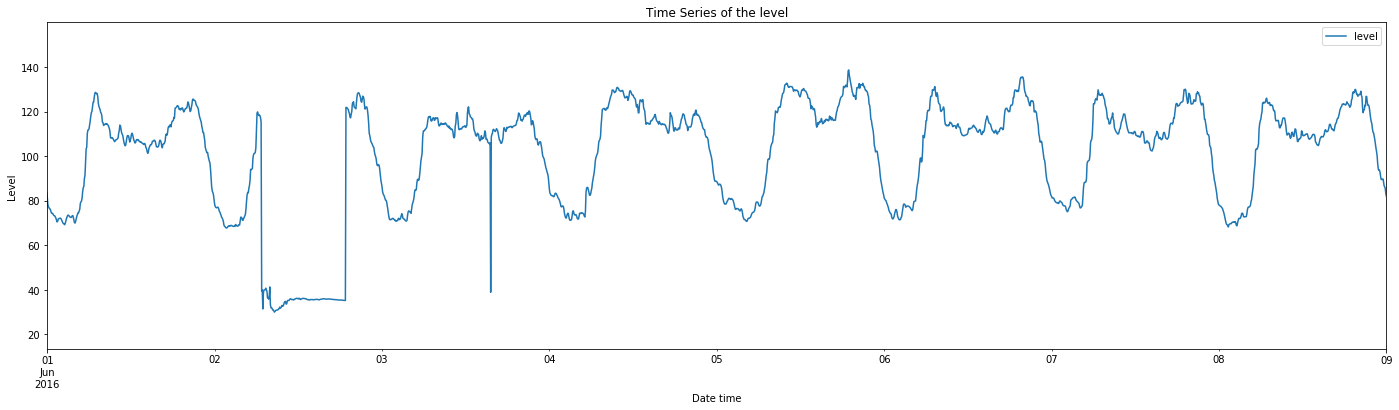

In [127]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
'''level'''

total.plot(x='time', y='level', figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.xlim('2016-06-01 00:00:00','2016-06-09 00:00:00'); #adjustable

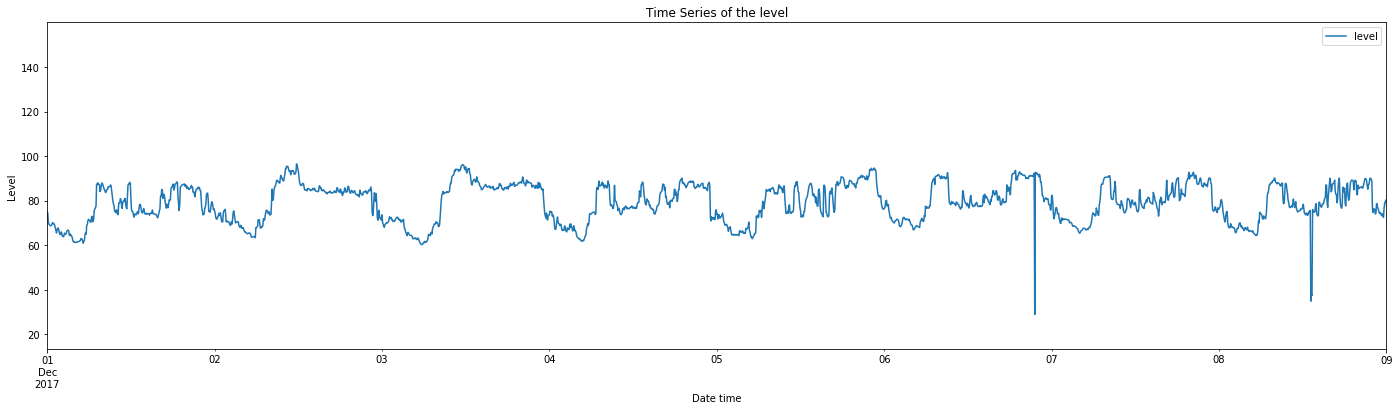

In [128]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
'''level'''

total.plot(x='time', y='level', figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.xlim('2017-12-01 00:00:00','2017-12-09 00:00:00'); #adjustable

### Seasonal trends<a name="step4"></a>

In [129]:
#prepare the table
#extract seasonal info from the date
total['month'] = total.time.dt.month
total['day'] = total.time.dt.day
total['year'] = total.time.dt.year
total['wday'] = total.time.dt.day_name()
total['hour'] = total.time.dt.hour
total.head()

,time,velocity,final_velocity,level,final_level,month,day,year,wday,hour
0,2014-09-01 00:00:00,0.8883,0.8883,74.529999,74.529999,9,1,2014,Monday,0
1,2014-09-01 00:05:00,0.8856,0.8856,75.029999,75.029999,9,1,2014,Monday,0
2,2014-09-01 00:10:00,0.8379,0.8379,74.300003,74.300003,9,1,2014,Monday,0
3,2014-09-01 00:15:00,0.8514,0.8514,74.309998,74.309998,9,1,2014,Monday,0
4,2014-09-01 00:20:00,0.8487,0.8487,80.050003,80.050003,9,1,2014,Monday,0


In [130]:
#extract holidays for Canada and save into df  

# Select country 
ca_holidays = holidays.CA() 
  
# create df with holidays
CA_holidays= []
for ptr in holidays.CA(years = [2014,2015,2016,2017]).items(): 
    CA_holidays.append(ptr)
CA_holidays_df = pd.DataFrame(CA_holidays, columns=["data", "holidays"])
CA_holidays_df['data'] = pd.to_datetime(CA_holidays_df['data'])

CA_holidays_df.dtypes, CA_holidays_df.head()

(data        datetime64[ns]
 holidays            object
 dtype: object,         data        holidays
 0 2016-01-01  New Year's Day
 1 2016-02-15      Family Day
 2 2016-03-25     Good Friday
 3 2016-05-23    Victoria Day
 4 2016-07-01      Canada Day)

In [131]:
#merge total df with holidays df
total = total.merge(CA_holidays_df[["data", "holidays"]], left_on="time",
    right_on="data", how='left' )
total.head()

,time,velocity,final_velocity,level,final_level,month,day,year,wday,hour,data,holidays
0,2014-09-01 00:00:00,0.8883,0.8883,74.529999,74.529999,9,1,2014,Monday,0,2014-09-01,Labour Day
1,2014-09-01 00:05:00,0.8856,0.8856,75.029999,75.029999,9,1,2014,Monday,0,NaT,NaN
2,2014-09-01 00:10:00,0.8379,0.8379,74.300003,74.300003,9,1,2014,Monday,0,NaT,NaN
3,2014-09-01 00:15:00,0.8514,0.8514,74.309998,74.309998,9,1,2014,Monday,0,NaT,NaN
4,2014-09-01 00:20:00,0.8487,0.8487,80.050003,80.050003,9,1,2014,Monday,0,NaT,NaN


### Plot seasonal trends for velocity<a name="step5"></a>

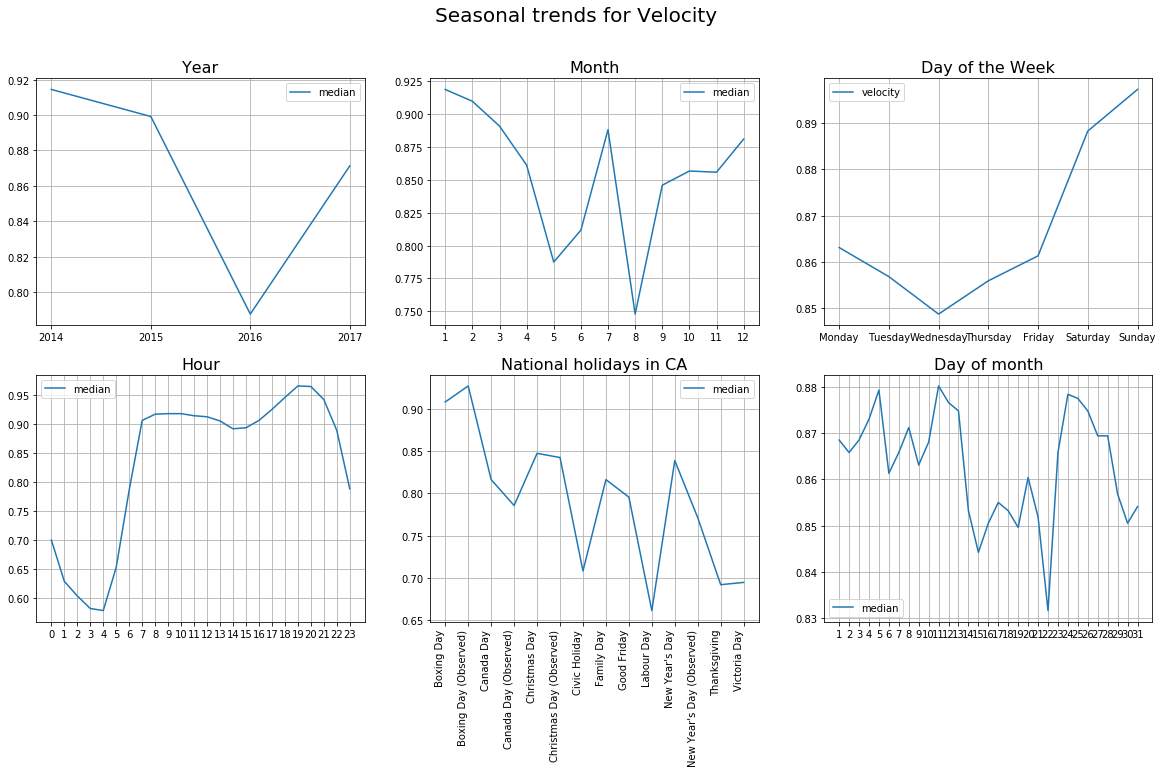

In [132]:
'''Plot seasonal trends for velocity'''


fig, axs = plt.subplots(figsize=(20,10),nrows=2, ncols=3)#, sharey=True)                                   
plt.suptitle("Seasonal trends for Velocity", fontsize=20)

total.velocity.groupby(total.year).median().rename('median').plot( legend=True,ax=axs[0][0])
axs[0][0].set_title("Year", fontsize=16, loc='center')
axs[0][0].set_xticks([2014,2015,2016,2017])

total.velocity.groupby(total.month).median().rename('median').plot(legend=True,ax=axs[0][1])
axs[0][1].set_title("Month", fontsize=16, loc='center')
axs[0][1].set_xticks(np.arange(start=1, stop=13, step=1))


total.velocity.groupby(total.wday, sort = False).median().plot(legend=True,ax=axs[0][2])
axs[0][2].set_title("Day of the Week", fontsize=16, loc='center')

total.velocity.groupby(total.hour).median().rename('median').plot(legend=True, ax=axs[1][0])
axs[1][0].set_title("Hour", fontsize=16, loc='center')
axs[1][0].set_xticks(np.arange(start=0, stop=24, step=1))

total.velocity.groupby(total.holidays).median().rename('median').plot(legend=True, ax=axs[1][1])
axs[1][1].set_title("National holidays in CA", fontsize=16, loc='center')
axs[1][1].set_xticks(np.arange(14))
axs[1][1].set_xticklabels(list(total.velocity.groupby(total.holidays).median().rename('median').index), 
                          rotation = 90, ha="right")

total.velocity.groupby(total.day).median().rename('median').plot(legend=True, ax=axs[1][2])
axs[1][2].set_title("Day of month", fontsize=16, loc='center')
axs[1][2].set_xticks(np.arange(start=1, stop=32, step=1))

for ax in axs.flat:
    ax.set(ylabel='', xlabel="")
    ax.grid(which='major')
    #ax.xaxis.grid()
    ax.legend(loc="best");

The 'velocity' values are varying within wide limits, which changes during the whole issued period, months, day of week, day of month, within national holidays and withing a day (24h). There are complex seasonal trends, which need to take into account with future modeling. Short overview:
        
        -yearly: 2016 was the year with lowest velocity values
    
        -montly: there are some peaks, highest in January and July with 2 main descreases in May and August 
    
        -weekly: velocity is lowest am Wednesdays, and growing to Sundays  
    
        -hourly: the minimal values per day are registered at 4AM, then follow signal uprise and after 7AM its come to platoe. after 4PM its rising to 8PM and after that decreasing upt to its minimun at 4AM. This trend is exactly like this for level
    
        -national holidays in CA: there are higher or lower values for some holidays every year
        
        -the lowest values are registered in the midle of the each month

### Plot seasonal trends for level<a name="step6"></a>

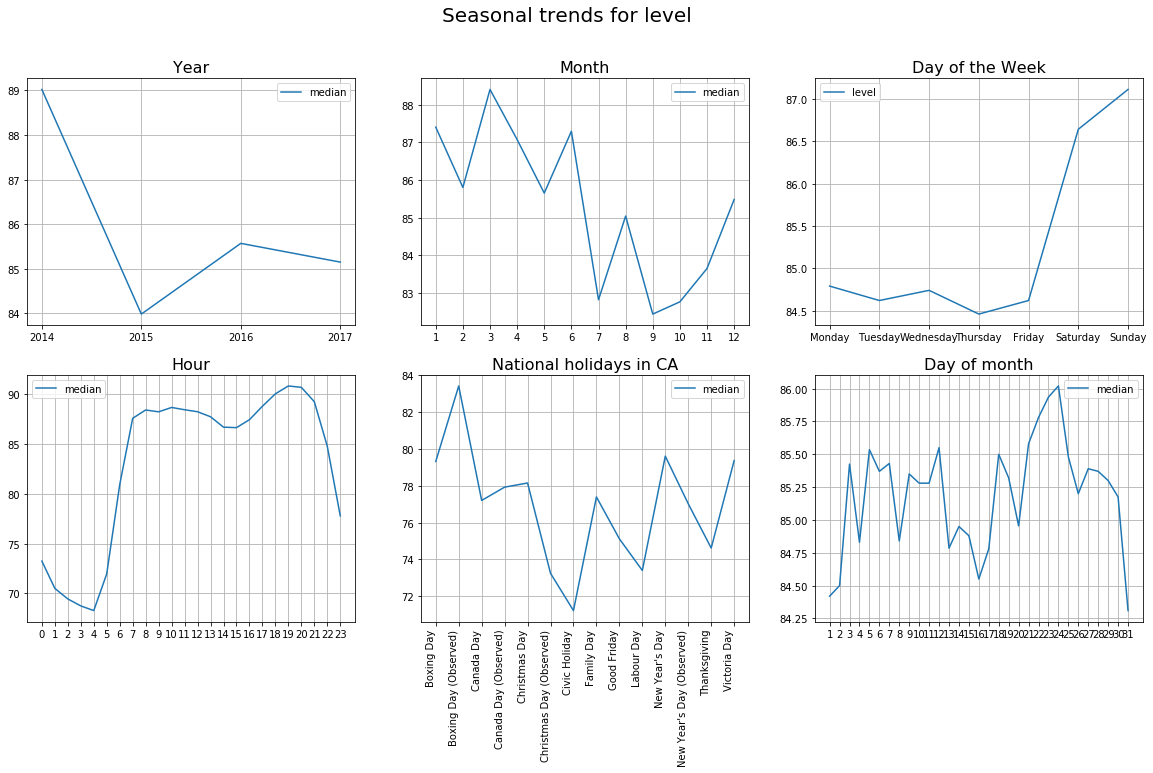

In [133]:
'''Plot seasonal trends for level'''


fig, axs = plt.subplots(figsize=(20,10),nrows=2, ncols=3)#, sharey=True)                                   
plt.suptitle("Seasonal trends for level", fontsize=20)

total.level.groupby(total.year).median().rename('median').plot( legend=True,ax=axs[0][0])
axs[0][0].set_title("Year", fontsize=16, loc='center')
axs[0][0].set_xticks([2014,2015,2016,2017])

total.level.groupby(total.month).median().rename('median').plot(legend=True,ax=axs[0][1])
axs[0][1].set_title("Month", fontsize=16, loc='center')
axs[0][1].set_xticks(np.arange(start=1, stop=13, step=1))


total.level.groupby(total.wday, sort = False).median().plot(legend=True,ax=axs[0][2])
axs[0][2].set_title("Day of the Week", fontsize=16, loc='center')

total.level.groupby(total.hour).median().rename('median').plot(legend=True, ax=axs[1][0])
axs[1][0].set_title("Hour", fontsize=16, loc='center')
axs[1][0].set_xticks(np.arange(start=0, stop=24, step=1))

total.level.groupby(total.holidays).median().rename('median').plot(legend=True, ax=axs[1][1])
axs[1][1].set_title("National holidays in CA", fontsize=16, loc='center')
axs[1][1].set_xticks(np.arange(14))
axs[1][1].set_xticklabels(list(total.level.groupby(total.holidays).median().rename('median').index), 
                          rotation = 90, ha="right")

total.level.groupby(total.day).median().rename('median').plot(legend=True, ax=axs[1][2])
axs[1][2].set_title("Day of month", fontsize=16, loc='center')
axs[1][2].set_xticks(np.arange(start=1, stop=32, step=1))

for ax in axs.flat:
    ax.set(ylabel='', xlabel="")
    ax.grid(which='major')
    #ax.xaxis.grid()
    ax.legend(loc="best");

- The 'level' values are varying within wide limits, which changes during the whole issued period, months, day of week, day of month, within national holidays and withing a day (24h). There are complex seasonal trends, which need to take into account with future modeling. Short overview:
        
        -yearly: 2015 was the year with lowest level values
    
        -montly: there are some peaks, highest in January and June with 2 main descreases in July and September 
    
        -weekly: Monday till Friday the level values are stabil, and increading over weekends   
    
        -hourly: the minimal values per day are registered at 4AM, then follow signal uprise and after 7AM its come to platoe. after 4PM its rising to 8PM and after that decreasing upt to its minimun at 4AM. This trend is exactly like this for level
    
        -national holidays in CA: there are higher or lower values for some holidays every year
        
        -hovewer very variable, the lowest values are registered in the begining, midle and end of the each months 

### General Conclusions:<a name="step7"></a>


- The data collected for the period from 2014-09-01 to 2017-12-31, and recorded regilary each 5 min. No duplicates detected.


- Missing data:

    - There 0.03% of the missing values in the 'velocity', and 6% of missing data in 'final_velocity'. I will use 'velocity' for anomaly detection and prediction. 
    
    - There are no missing values in the 'level', and 6% of missing data in 'final_level'. I will use 'level' for anomaly detection and prediction.
    
    - I left missing data, as some models accept data with missing values.


- The 'velocity' and 'level' values are varying within wide limits, which changes during the whole issued period, months, day of week, day of month, within national holidays and withing a day (24h). There are complex seasonal trends, which need to take into account with future modeling. The common trend for both features(velocity, level): the value is growing during weekends, and the values is growing withing a day hours comparing to night.
